In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 10
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)


train_x = torch.unsqueeze(train_data.data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.targets
print(train_x.shape)

test_x = torch.unsqueeze(test_data.data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.targets[:2000]
# warning
# train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
# train_y = train_data.train_labels
# print(train_x.shape)

# test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
# test_y = test_data.test_labels[:2000]


/Users/kancheng/opt/anaconda3/envs/pytorch-init/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631227379/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000, 1, 28, 28])


In [3]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [4]:
import matplotlib.pyplot as plt

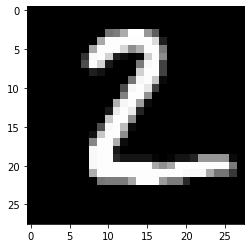

In [5]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

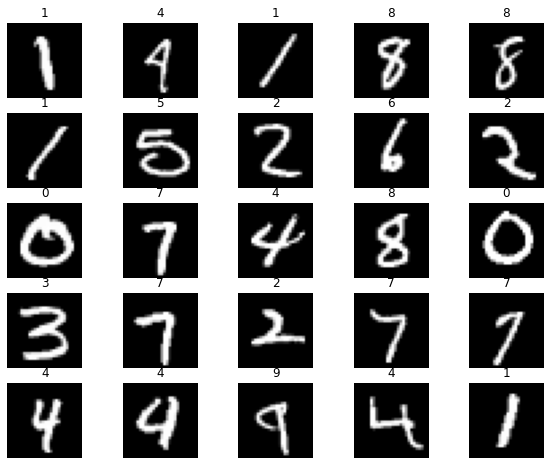

In [6]:
# 繪製多個 train_data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [8]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output
fc = FC()   
optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
#loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 50000
batch_size = 50
for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
        output = fc(b_x)
        loss = loss_func(output, b_y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')


Epoch:  0 | train loss: 2.3008 | test accuracy: 0.150
Epoch:  0 | train loss: 0.4211 | test accuracy: 0.836
Epoch:  0 | train loss: 0.1977 | test accuracy: 0.894
Epoch:  0 | train loss: 0.2739 | test accuracy: 0.895
Epoch:  0 | train loss: 0.2279 | test accuracy: 0.933
Epoch:  0 | train loss: 0.0972 | test accuracy: 0.938
Epoch:  0 | train loss: 0.2361 | test accuracy: 0.951
Epoch:  0 | train loss: 0.2102 | test accuracy: 0.957
Epoch:  0 | train loss: 0.0642 | test accuracy: 0.956
Epoch:  0 | train loss: 0.0603 | test accuracy: 0.951
Epoch:  0 | train loss: 0.1301 | test accuracy: 0.965
Epoch:  0 | train loss: 0.1806 | test accuracy: 0.959
Epoch:  0 | train loss: 0.1146 | test accuracy: 0.961
Epoch:  0 | train loss: 0.0452 | test accuracy: 0.965
Epoch:  0 | train loss: 0.0467 | test accuracy: 0.967
Epoch:  0 | train loss: 0.0450 | test accuracy: 0.971
Epoch:  0 | train loss: 0.1723 | test accuracy: 0.969
Epoch:  0 | train loss: 0.2110 | test accuracy: 0.969
Epoch:  0 | train loss: 0.14

Epoch:  7 | train loss: 0.0007 | test accuracy: 0.985
Epoch:  7 | train loss: 0.0056 | test accuracy: 0.986
Epoch:  7 | train loss: 0.0029 | test accuracy: 0.986
Epoch:  7 | train loss: 0.0469 | test accuracy: 0.988
Epoch:  7 | train loss: 0.0042 | test accuracy: 0.985
Epoch:  7 | train loss: 0.0139 | test accuracy: 0.986
Epoch:  7 | train loss: 0.0209 | test accuracy: 0.987
Epoch:  7 | train loss: 0.0569 | test accuracy: 0.986
Epoch:  8 | train loss: 0.0010 | test accuracy: 0.984
Epoch:  8 | train loss: 0.0007 | test accuracy: 0.988
Epoch:  8 | train loss: 0.0288 | test accuracy: 0.988
Epoch:  8 | train loss: 0.0009 | test accuracy: 0.985
Epoch:  8 | train loss: 0.0052 | test accuracy: 0.987
Epoch:  8 | train loss: 0.0008 | test accuracy: 0.988
Epoch:  8 | train loss: 0.0005 | test accuracy: 0.985
Epoch:  8 | train loss: 0.0049 | test accuracy: 0.987
Epoch:  8 | train loss: 0.0037 | test accuracy: 0.986
Epoch:  8 | train loss: 0.0060 | test accuracy: 0.984
Epoch:  8 | train loss: 0.00

In [9]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [10]:
test_output

tensor([[-16.3710, -13.6668,   1.2841,  -2.1390, -21.0459,  -7.0917, -36.9186,
          20.4611, -12.4861,  -3.4194]], grad_fn=<AddmmBackward>)

In [11]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

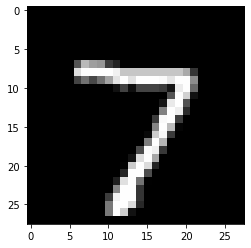

In [12]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [13]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

(0, 1, 2, Ellipsis, 9)